In [1]:
# Implementing a one-layer Neural Network
# ---------------------------------------
#
# We will illustrate how to create a one hidden layer NN
#
# We will use the iris data for this exercise
#
# We will build a one-hidden layer neural network
#  to predict the fourth attribute, Petal Width from
#  the other three (Sepal length, Sepal width, Petal length).
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from tensorflow.python.framework import ops

ops.reset_default_graph()
iris = datasets.load_iris()
#print(iris.data) # four column
x_vals = np.array([x[0:3] for x in iris.data])# n * 3
y_vals = np.array([y[3] for y in iris.data]) #n * 1
# print(x_vals,y_vals)
# Create graph session 
sess = tf.Session()
# Split data into train/test = 80%/20%
x_vals_len = len(x_vals)
train_indices = np.random.choice(x_vals_len,round(x_vals_len * 0.8),replace=False)
test_indices = np.array(list(set(range(x_vals_len)) - set(train_indices)))
# print(test_indices)
x_vals_train = x_vals[train_indices]
x_vals_test = x_vals[test_indices]

y_vals_train = y_vals[train_indices]
y_vals_test = y_vals[test_indices]
# print(np.transpose([y_vals_test]))

# Normalize by column (min-max norm)
def normalize_cols(m):
    col_max = m.max(axis=0)
    col_min = m.min(axis=0)
    return (m - col_min) / (col_max - col_min)

x_vals_train = np.nan_to_num(normalize_cols(x_vals_train))
x_vals_test = np.nan_to_num(normalize_cols(x_vals_test))
# print(x_vals_train,x_vals_test)
# Declare batch size
batch_size = 50

# Initialize placeholders
x_data = tf.placeholder(shape=[None,3],dtype=tf.float32)
y_target = tf.placeholder(shape=[None,1],dtype=tf.float32)

In [2]:
# Create variables for both NN layers
hidden_layer_nodes = 10
A1 = tf.Variable(tf.random_normal(shape=[3,hidden_layer_nodes])) # inputs -> hidden nodes
b1 = tf.Variable(tf.random_normal(shape=[hidden_layer_nodes]))# one biases for each hidden node
A2 = tf.Variable(tf.random_normal(shape=[hidden_layer_nodes,1]))# hidden inputs -> 1 output
b2 = tf.Variable(tf.random_normal(shape=[1])) # 1 bias for the output
# Declare model operations
hidden_output = tf.nn.relu(tf.add(tf.matmul(x_data,A1),b1))
final_output = tf.nn.relu(tf.add(tf.matmul(hidden_output,A2),b2))
# Declare loss function (MSE)
loss = tf.reduce_mean(tf.square(y_target - final_output))
# Declare optimizer
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(loss)
init = tf.global_variables_initializer()
sess.run(init)

In [3]:
# Training loop
train_loss_vec = []
test_loss_vec = []
for step in range(500):
    rand_index = np.random.choice(len(x_vals_train),size=batch_size)
    feed_x = x_vals_train[rand_index]
    feed_y = y_vals_train[rand_index]
#     print(feed_y)
#     print(np.transpose([feed_y]))
    print(y_target)
    sess.run(train_step,feed_dict={x_data: feed_x,y_target: np.transpose([feed_y])})
    train_tmp_loss = sess.run(loss,feed_dict={x_data:feed_x,y_target: np.transpose([feed_y])})
    train_loss_vec.append(train_tmp_loss)
    test_tmp_loss = sess.run(loss,feed_dict={x_data: x_vals_test,y_target: np.transpose([y_vals_test])})
    test_loss_vec.append(test_tmp_loss)
    if (step + 1) % 50 == 0:
        print('Generation: ' + str(step + 1) + '. Loss = ' + str(train_tmp_loss))

Tensor("Placeholder_1:0", shape=(?, 1), dtype=float32)
Tensor("Placeholder_1:0", shape=(?, 1), dtype=float32)
Tensor("Placeholder_1:0", shape=(?, 1), dtype=float32)
Tensor("Placeholder_1:0", shape=(?, 1), dtype=float32)
Tensor("Placeholder_1:0", shape=(?, 1), dtype=float32)
Tensor("Placeholder_1:0", shape=(?, 1), dtype=float32)
Tensor("Placeholder_1:0", shape=(?, 1), dtype=float32)
Tensor("Placeholder_1:0", shape=(?, 1), dtype=float32)
Tensor("Placeholder_1:0", shape=(?, 1), dtype=float32)
Tensor("Placeholder_1:0", shape=(?, 1), dtype=float32)
Tensor("Placeholder_1:0", shape=(?, 1), dtype=float32)
Tensor("Placeholder_1:0", shape=(?, 1), dtype=float32)
Tensor("Placeholder_1:0", shape=(?, 1), dtype=float32)
Tensor("Placeholder_1:0", shape=(?, 1), dtype=float32)
Tensor("Placeholder_1:0", shape=(?, 1), dtype=float32)
Tensor("Placeholder_1:0", shape=(?, 1), dtype=float32)
Tensor("Placeholder_1:0", shape=(?, 1), dtype=float32)
Tensor("Placeholder_1:0", shape=(?, 1), dtype=float32)
Tensor("Pl

Tensor("Placeholder_1:0", shape=(?, 1), dtype=float32)
Tensor("Placeholder_1:0", shape=(?, 1), dtype=float32)
Tensor("Placeholder_1:0", shape=(?, 1), dtype=float32)
Tensor("Placeholder_1:0", shape=(?, 1), dtype=float32)
Tensor("Placeholder_1:0", shape=(?, 1), dtype=float32)
Tensor("Placeholder_1:0", shape=(?, 1), dtype=float32)
Tensor("Placeholder_1:0", shape=(?, 1), dtype=float32)
Tensor("Placeholder_1:0", shape=(?, 1), dtype=float32)
Tensor("Placeholder_1:0", shape=(?, 1), dtype=float32)
Tensor("Placeholder_1:0", shape=(?, 1), dtype=float32)
Tensor("Placeholder_1:0", shape=(?, 1), dtype=float32)
Tensor("Placeholder_1:0", shape=(?, 1), dtype=float32)
Tensor("Placeholder_1:0", shape=(?, 1), dtype=float32)
Tensor("Placeholder_1:0", shape=(?, 1), dtype=float32)
Tensor("Placeholder_1:0", shape=(?, 1), dtype=float32)
Generation: 200. Loss = 0.0711029
Tensor("Placeholder_1:0", shape=(?, 1), dtype=float32)
Tensor("Placeholder_1:0", shape=(?, 1), dtype=float32)
Tensor("Placeholder_1:0", shape

Tensor("Placeholder_1:0", shape=(?, 1), dtype=float32)
Tensor("Placeholder_1:0", shape=(?, 1), dtype=float32)
Tensor("Placeholder_1:0", shape=(?, 1), dtype=float32)
Tensor("Placeholder_1:0", shape=(?, 1), dtype=float32)
Tensor("Placeholder_1:0", shape=(?, 1), dtype=float32)
Tensor("Placeholder_1:0", shape=(?, 1), dtype=float32)
Tensor("Placeholder_1:0", shape=(?, 1), dtype=float32)
Tensor("Placeholder_1:0", shape=(?, 1), dtype=float32)
Tensor("Placeholder_1:0", shape=(?, 1), dtype=float32)
Tensor("Placeholder_1:0", shape=(?, 1), dtype=float32)
Tensor("Placeholder_1:0", shape=(?, 1), dtype=float32)
Tensor("Placeholder_1:0", shape=(?, 1), dtype=float32)
Tensor("Placeholder_1:0", shape=(?, 1), dtype=float32)
Tensor("Placeholder_1:0", shape=(?, 1), dtype=float32)
Tensor("Placeholder_1:0", shape=(?, 1), dtype=float32)
Tensor("Placeholder_1:0", shape=(?, 1), dtype=float32)
Tensor("Placeholder_1:0", shape=(?, 1), dtype=float32)
Tensor("Placeholder_1:0", shape=(?, 1), dtype=float32)
Tensor("Pl

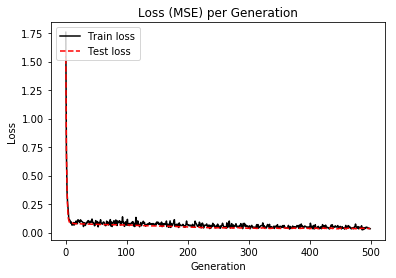

In [4]:
# Plot loss (MSE) over time
plt.plot(train_loss_vec,'k-',label="Train loss")
plt.plot(test_loss_vec,'r--',label="Test loss")
plt.title('Loss (MSE) per Generation')
plt.legend(loc = "upper left")
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.show()
# help(plt.plot)